## Gradient Descent in Numpy

I originally put this together a few years ago, as much for my own learning as
anything else. This optimiser will find the parameters of an optimal hyperplane
by gradient descent with either MAE or MSE loss.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from optimiser import optimiser

First we can generate points with added noise sampled from the Normal Distribution

In [164]:
x = np.linspace(0,5,10)
e = np.random.normal
f = lambda x: x**2 + e(0,3,10)
y = f(x)

y = np.expand_dims(y,1)
x = np.expand_dims(x,1)

In [217]:
loss_mae, beta_mae = optimiser(x,y,loss='mae', epochs=300, lr=0.001)
loss_mse, beta_mse = optimiser(x,y,loss='mse', epochs=50, lr=0.001)

x_ = np.linspace(0,5,100)
mae_y = beta_mae[1]*x_ + beta_mae[0]
mse_y = beta_mse[1]*x_ + beta_mse[0]

The function returns a list of loss values (per epoch) and parameters of the fitted hyperplane
beta[0] corresponds to the constant term whilst beta[1:] are the coefficients of the of the covariates
as the appear in the input data matrix x.

We can plot the losses. As might be expected MAE loss decreases linearly but takes many more epochs to converge (or alternatively a greater learning rate could be used).


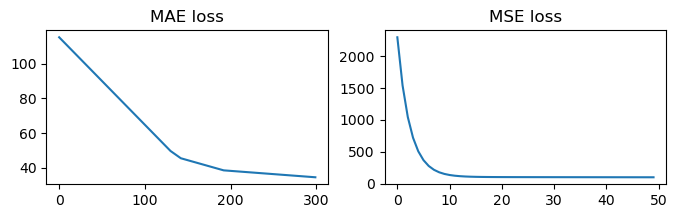

In [219]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,2) )
ax[0].plot(loss_mae)
ax[0].set_title('MAE loss')
ax[1].plot(loss_mse)
ax[1].set_title('MSE loss');

And, we can plot the fitted lines. Given the nature of the data we generated, this lines unfortunately appear quite similar but they are not, ofcourse, the same

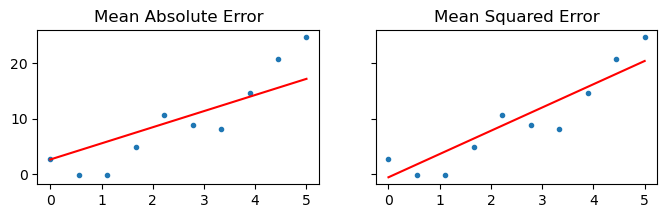

In [220]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,2),sharey=True )
ax[0].scatter(x,y,marker='.')
ax[0].plot(x_,mae_y,c='red')
ax[0].set_title('Mean Absolute Error')
ax[1].scatter(x,y,marker='.')
ax[1].plot(x_,mse_y,c='red')
ax[1].set_title('Mean Squared Error');

In [162]:
len(mae_y)

100

In [163]:
len(x)

100